In [35]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



In [32]:
cleveland_data <- read_csv("data/processed_cleveland.csv")|>
                mutate(sex = as_factor(sex),
                       cp = as_factor(cp),
                       fbs = as_factor(fbs),
                       restecg = as_factor(restecg),
                       exang = as_factor(exang),
                       slope = as_factor(slope),
                       thal = as_factor(thal),
                       num = as_factor(num))|>
                rename(chest_pain = cp,
                       blood_pressure = trestbps,
                       cholesterol = chol,
                       blood_sugar = fbs,
                       rest_ecg = restecg,
                       heart_rate = thalach,
                       angina = exang,
                       st_depression = oldpeak,
                       num_vessels = ca,
                       diagnosis = num)

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,angina,st_depression,slope,num_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [39]:
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 226
Columns: 14
$ age            <dbl> 63, 41, 56, 57, 56, 54, 49, 58, 50, 58, 66, 43, 69, 59,…
$ sex            <fct> 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1…
$ chest_pain     <fct> 1, 2, 2, 4, 2, 4, 2, 1, 3, 3, 1, 4, 1, 4, 3, 4, 3, 3, 4…
$ blood_pressure <dbl> 145, 130, 120, 120, 140, 140, 130, 150, 120, 120, 150, …
$ cholesterol    <dbl> 233, 204, 236, 354, 294, 239, 266, 283, 219, 340, 226, …
$ blood_sugar    <fct> 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0…
$ rest_ecg       <fct> 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2…
$ heart_rate     <dbl> 150, 172, 178, 163, 153, 160, 171, 162, 158, 172, 114, …
$ angina         <fct> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0…
$ st_depression  <dbl> 2.3, 1.4, 0.8, 0.6, 1.3, 1.2, 0.6, 1.0, 1.6, 0.0, 2.6, …
$ slope          <fct> 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2…
$ num_vessels    <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0",…
$ thal           <

In [41]:
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))

heart_disease_proportions

diagnosis,n,percent
<fct>,<int>,<dbl>
0,123,54.424779
1,41,18.141593
2,27,11.946903
3,27,11.946903
4,8,3.539823


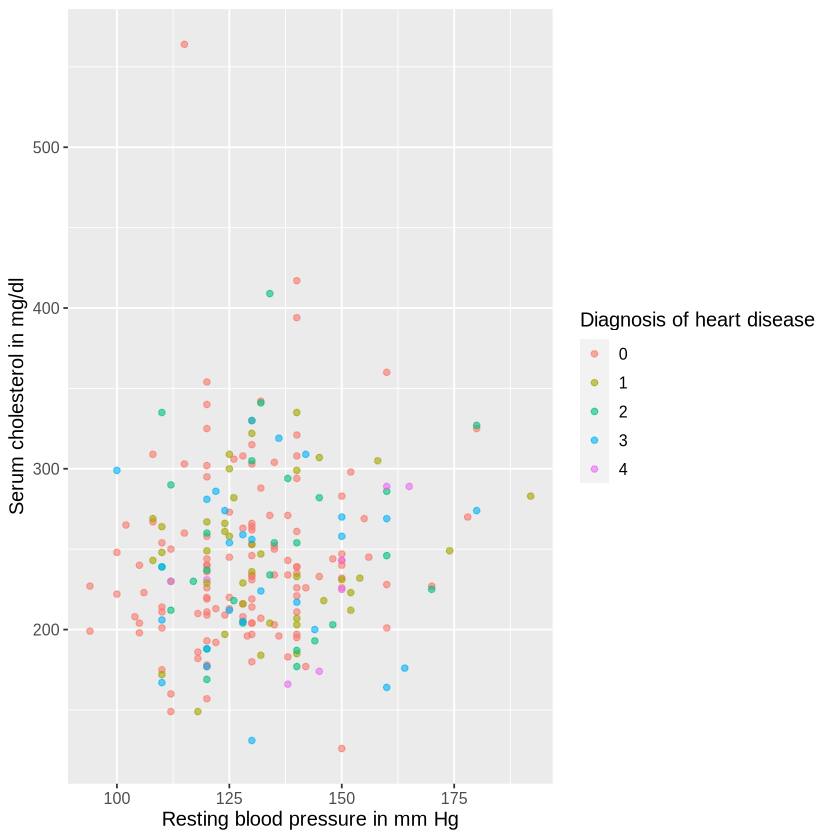

In [65]:
rbp_chol_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = cholesterol, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Serum cholesterol in mg/dl", 
                     color = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
rbp_chol_plot

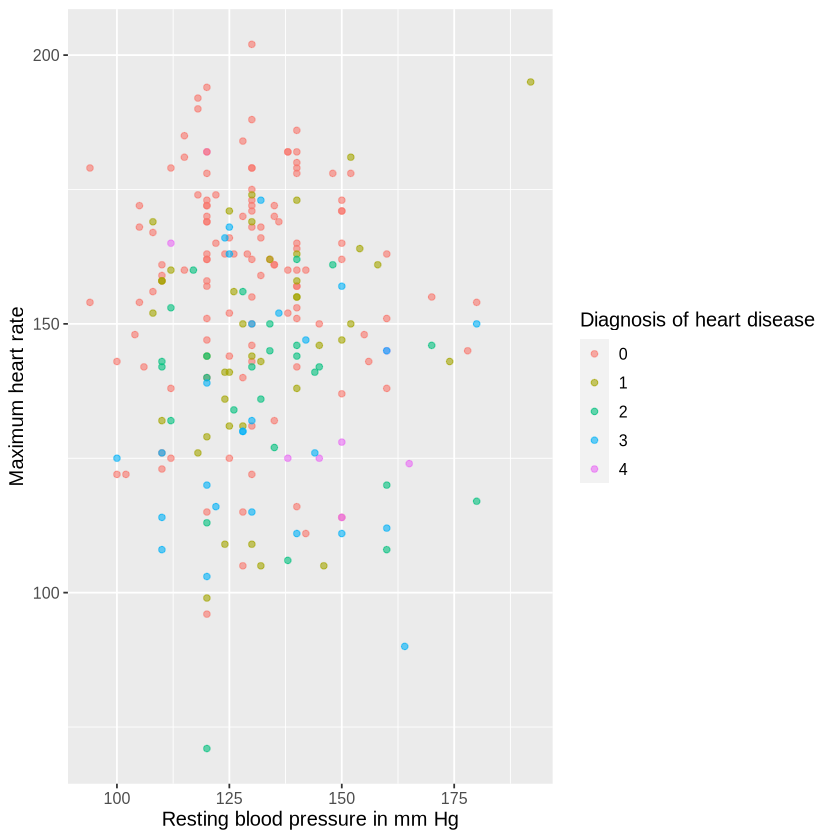

In [64]:
rbp_hr_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = heart_rate, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Maximum heart rate", 
                     color = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
rbp_hr_plot

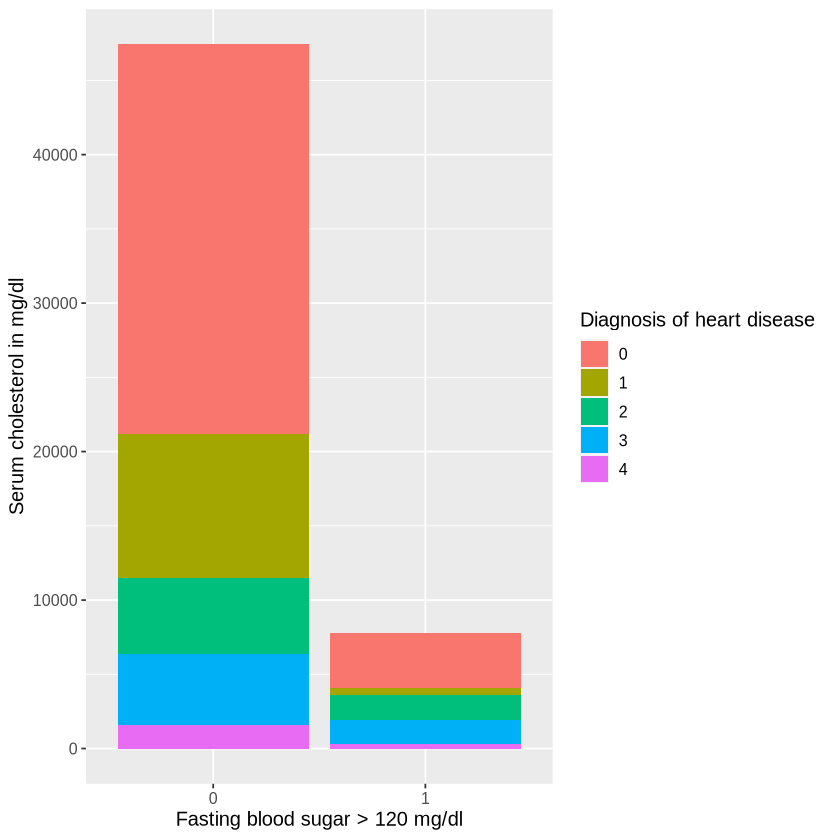

In [62]:
fbs_chol_plot <- ggplot(cleveland_train, aes(x = blood_sugar, y = cholesterol, fill = diagnosis)) +
                geom_bar(stat = "identity") +
                labs(x = "Fasting blood sugar > 120 mg/dl",
                     y = "Serum cholesterol in mg/dl",
                     fill = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
fbs_chol_plot